## Import Libraries:

In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
import tensorflow as tf
from tensorflow import keras

## Import data and Reshape:

In [4]:
digit_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = digit_mnist.load_data()

In [5]:
X_train_full = X_train_full.reshape((60000, 28, 28, 1))
X_test = X_test.reshape((10000, 28, 28, 1))

## Normalize the data:

In [6]:
X_train_n = X_train_full/255.
X_test_n = X_test/255.

## Create a validation set:

In [9]:
X_valid, X_train = X_train_n[:6000], X_train_n[6000:]
y_valid, y_train = y_train_full[:6000], y_train_full[6000:]

## Create Model_A:

In [10]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

model_A = Sequential([
    Conv2D(32, (3, 3), strides=1, padding='valid', activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(200, activation='relu'),
    Dense(100, activation='relu'),
    Dense(10, activation='softmax')
])

## Compile and train Model_A:

In [11]:
model_A.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history_A = model_A.fit(X_train, y_train, epochs=60, validation_data=(X_valid, y_valid))


Epoch 1/60


1688/1688 [==============================] - 51s 27ms/step - loss: 0.4027 - accuracy: 0.8555 - val_loss: 0.3080 - val_accuracy: 0.8867
Epoch 2/60
1688/1688 [==============================] - 27s 16ms/step - loss: 0.2617 - accuracy: 0.9034 - val_loss: 0.2768 - val_accuracy: 0.8978
Epoch 3/60
1688/1688 [==============================] - 24s 14ms/step - loss: 0.2149 - accuracy: 0.9200 - val_loss: 0.2408 - val_accuracy: 0.9100
Epoch 4/60
1688/1688 [==============================] - 22s 13ms/step - loss: 0.1817 - accuracy: 0.9323 - val_loss: 0.2392 - val_accuracy: 0.9137
Epoch 5/60
1688/1688 [==============================] - 23s 14ms/step - loss: 0.1528 - accuracy: 0.9435 - val_loss: 0.2369 - val_accuracy: 0.9167
Epoch 6/60
1688/1688 [==============================] - 24s 14ms/step - loss: 0.1277 - accuracy: 0.9517 - val_loss: 0.2795 - val_accuracy: 0.9118
Epoch 7/60
1688/1688 [==============================] - 23s 14ms/step - loss: 0.1033 - accuracy: 0.9615 - val_loss: 0.276

Epoch 52/60
1688/1688 [==============================] - 20s 12ms/step - loss: 0.0115 - accuracy: 0.9969 - val_loss: 0.9725 - val_accuracy: 0.9098
Epoch 53/60
1688/1688 [==============================] - 20s 12ms/step - loss: 0.0102 - accuracy: 0.9971 - val_loss: 0.9267 - val_accuracy: 0.9127
Epoch 54/60
1688/1688 [==============================] - 20s 12ms/step - loss: 0.0062 - accuracy: 0.9981 - val_loss: 0.9503 - val_accuracy: 0.9150
Epoch 55/60
1688/1688 [==============================] - 20s 12ms/step - loss: 0.0090 - accuracy: 0.9971 - val_loss: 1.0597 - val_accuracy: 0.9067
Epoch 56/60
1688/1688 [==============================] - 20s 12ms/step - loss: 0.0130 - accuracy: 0.9963 - val_loss: 0.9064 - val_accuracy: 0.9118
Epoch 57/60
1688/1688 [==============================] - 20s 12ms/step - loss: 0.0076 - accuracy: 0.9976 - val_loss: 0.9724 - val_accuracy: 0.9107
Epoch 58/60
1688/1688 [==============================] - 20s 12ms/step - loss: 0.0093 - accuracy: 0.9973 - val_loss: 1

## Plot the loss and accuracy against epoch:

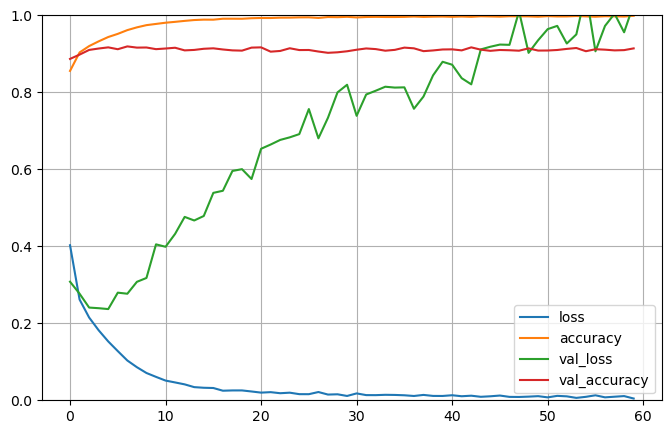

In [13]:
import matplotlib.pyplot as plt

pd.DataFrame(history_A.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

## Evaluate the model accuracy on the test dataset:

In [14]:
model_A.evaluate(X_test_n, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 1.0858 - accuracy: 0.9082


[1.0858491659164429, 0.9082000255584717]

# Create Model_B:

In [15]:
model_B = Sequential([
    Conv2D(64, (3, 3), strides=1, padding='valid', activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(200, activation='relu'),
    Dense(100, activation='relu'),
    Dense(10, activation='softmax')
])

## Compile and train Model_B:

In [16]:
model_B.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history_B = model_B.fit(X_train, y_train, epochs=60, validation_data=(X_valid, y_valid))

Epoch 1/60
1688/1688 [==============================] - 44s 25ms/step - loss: 0.3899 - accuracy: 0.8594 - val_loss: 0.2900 - val_accuracy: 0.8960
Epoch 2/60
1688/1688 [==============================] - 42s 25ms/step - loss: 0.2568 - accuracy: 0.9054 - val_loss: 0.2771 - val_accuracy: 0.8977
Epoch 3/60
1688/1688 [==============================] - 42s 25ms/step - loss: 0.2107 - accuracy: 0.9212 - val_loss: 0.2543 - val_accuracy: 0.9067
Epoch 4/60
1688/1688 [==============================] - 43s 26ms/step - loss: 0.1765 - accuracy: 0.9338 - val_loss: 0.2450 - val_accuracy: 0.9077
Epoch 5/60
1688/1688 [==============================] - 45s 27ms/step - loss: 0.1454 - accuracy: 0.9452 - val_loss: 0.2404 - val_accuracy: 0.9200
Epoch 6/60
1688/1688 [==============================] - 44s 26ms/step - loss: 0.1207 - accuracy: 0.9551 - val_loss: 0.2619 - val_accuracy: 0.9153
Epoch 7/60
1688/1688 [==============================] - 42s 25ms/step - loss: 0.0983 - accuracy: 0.9629 - val_loss: 0.2976 -

Epoch 57/60
1688/1688 [==============================] - 39s 23ms/step - loss: 0.0073 - accuracy: 0.9978 - val_loss: 1.1644 - val_accuracy: 0.9117
Epoch 58/60
1688/1688 [==============================] - 39s 23ms/step - loss: 0.0098 - accuracy: 0.9970 - val_loss: 1.1495 - val_accuracy: 0.9150
Epoch 59/60
1688/1688 [==============================] - 39s 23ms/step - loss: 0.0085 - accuracy: 0.9979 - val_loss: 1.1058 - val_accuracy: 0.9135
Epoch 60/60
1688/1688 [==============================] - 39s 23ms/step - loss: 0.0054 - accuracy: 0.9984 - val_loss: 1.0786 - val_accuracy: 0.9122


## Plot the loss and accuracy against epoch:

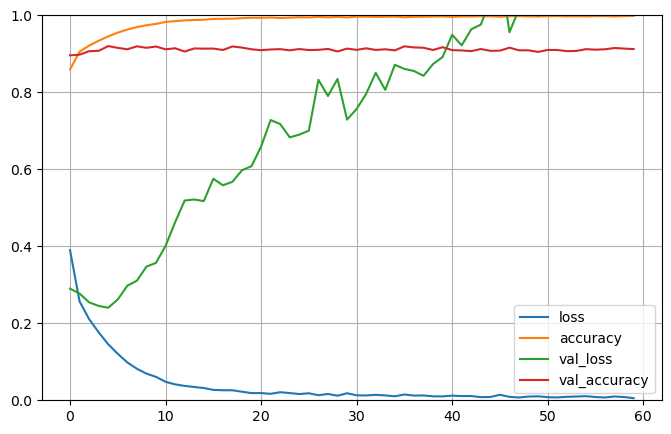

In [17]:
import matplotlib.pyplot as plt

pd.DataFrame(history_B.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

## Evaluate the model accuracy on the test dataset:

In [18]:
model_A.evaluate(X_test_n, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 1.0858 - accuracy: 0.9082


[1.0858491659164429, 0.9082000255584717]